# Mini project
## ML JUNE BATCH 1
(ASRA JAWAID)

In [1]:
import pandas as pd
import numpy as np

# for visualizations
import matplotlib as mlp
import matplotlib.pyplot as plt

from matplotlib.animation import FuncAnimation
import seaborn as sns
%matplotlib inline

Importing the dataset

In [2]:
data  = pd.read_csv("student_data.csv")
data.shape

(1000, 8)

Total no.of row = 1000
Total no. of columns = 8

In [3]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Target columns = math, reading and writing score

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


It is clear that the none of the column has any null values

### Correlations
To find the corrections all the data must be in digits and not Strings

In [6]:
data['Gender'] = pd.factorize(data.gender)[0]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Gender
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,0
2,female,group B,master's degree,standard,none,90,95,93,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1
4,male,group C,some college,standard,none,76,78,75,1


here we observe that a new column is created with name Gender. 
The 0 and 1 for 'female' and 'male' respectively. 

In [7]:
# replacing the gender value with that of Gender
data['gender']  = data['Gender']
data = data.drop('Gender', axis = 1)

In [8]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group B,bachelor's degree,standard,none,72,72,74
1,0,group C,some college,standard,completed,69,90,88
2,0,group B,master's degree,standard,none,90,95,93
3,1,group A,associate's degree,free/reduced,none,47,57,44
4,1,group C,some college,standard,none,76,78,75


In [9]:
data['race/ethnicity'] = pd.factorize(data['race/ethnicity'], sort = True)[0]
data.head()
# B- 0
# C- 1
# A- 2

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,bachelor's degree,standard,none,72,72,74
1,0,2,some college,standard,completed,69,90,88
2,0,1,master's degree,standard,none,90,95,93
3,1,0,associate's degree,free/reduced,none,47,57,44
4,1,2,some college,standard,none,76,78,75


In [10]:
data['parental level of education'] = pd.factorize(data['parental level of education'])[0]
data['lunch'] = pd.factorize(data['lunch'])[0]
data['test preparation course'] = pd.factorize(data['test preparation course'])[0]
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,0,0,0,72,72,74
1,0,2,1,0,1,69,90,88
2,0,1,2,0,0,90,95,93
3,1,0,3,1,0,47,57,44
4,1,2,1,0,0,76,78,75


In [11]:
data_corr = data.corr('pearson')
data_corr

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,1.000000,-0.001502,0.028383,-0.021372,0.006028,0.167982,-0.244313,-0.301225
race/ethnicity,-0.001502,1.000000,-0.080486,-0.046563,0.017508,0.216415,0.145253,0.165691
parental level of education,0.028383,-0.080486,1.000000,-0.014378,0.011558,-0.139236,-0.143429,-0.192338
lunch,-0.021372,-0.046563,-0.014378,1.000000,0.017044,-0.350877,-0.229560,-0.245769
test preparation course,0.006028,0.017508,0.011558,0.017044,1.000000,0.177702,0.241780,0.312946
math score,0.167982,0.216415,-0.139236,-0.350877,0.177702,1.000000,0.817580,0.802642
reading score,-0.244313,0.145253,-0.143429,-0.229560,0.241780,0.817580,1.000000,0.954598
writing score,-0.301225,0.165691,-0.192338,-0.245769,0.312946,0.802642,0.954598,1.000000


This can be visualized using heatmap

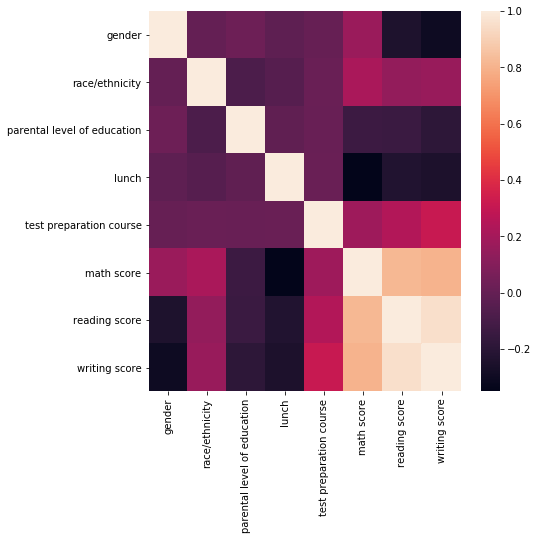

In [12]:
plt.figure(figsize= (7, 7))
sns.heatmap(data.corr())

It can be inferred from the graph that the test scores have more correlation with 'test preperation course', 'lunch' and 'race/ethnicity'. 'math score' seem to have some correlation with 'gender' as well.

In [13]:
# the columns having the correlation above 0.3
corr_target = abs(data_corr['math score'])

relevant_features = corr_target[corr_target > 0.3]
relevant_features

lunch            0.350877
math score       1.000000
reading score    0.817580
writing score    0.802642
Name: math score, dtype: float64

In [14]:
# correlation between each features
for i in data_corr:
    for j in data_corr:
        if j == i:
            continue
        elif abs(data_corr[i][j]) > 0.3:
            print(i,"-" ,j)
            

gender - writing score
lunch - math score
test preparation course - writing score
math score - lunch
math score - reading score
math score - writing score
reading score - math score
reading score - writing score
writing score - gender
writing score - test preparation course
writing score - math score
writing score - reading score


Inference: <br>
*The writing score has correlation with = gender, test preperation score, reading score and math score <br>
*The reading score has correlation with = writing score and math score <br>
*The math score has correlation with = lunch, reading score and writing score
<br>
It can also been seen that the features don't really correlate with one another. Therefore, they can't be dropped out of the model.

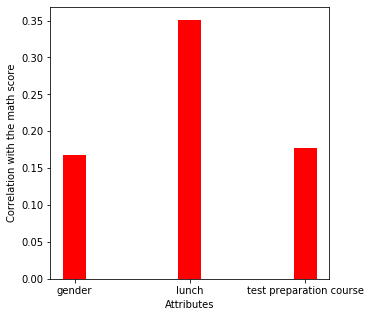

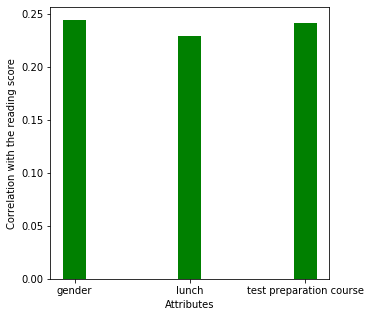

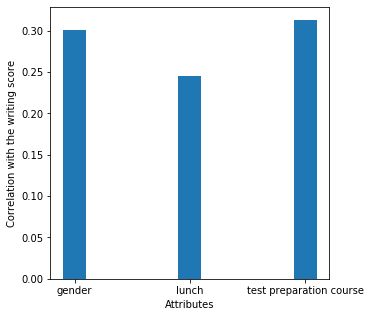

In [15]:
features = data.iloc[:, [0, 3, 4]]
target1 = data.loc[:, 'math score']
target2 = data.loc[:, 'reading score']
target3 = data.loc[:, 'writing score']
corr = [abs(data_corr[attr]['math score']) for attr in list(features)]
index = np.arange(len(list(features)))
plt.figure(figsize=(5, 5))
plt.bar(index, corr, width=0.2, color ="red" )
plt.xlabel('Attributes')
plt.ylabel('Correlation with the math score')
plt.xticks(index, list(features))
plt.show()
#####################################33
corr = [abs(data_corr[attr]['reading score']) for attr in list(features)]
index = np.arange(len(list(features)))
plt.figure(figsize=(5, 5))
plt.bar(index, corr, width=0.2, color = "green")
plt.xlabel('Attributes')
plt.ylabel('Correlation with the reading score')
plt.xticks(index, list(features))
plt.show()
######################################3
corr = [abs(data_corr[attr]['writing score']) for attr in list(features)]
index = np.arange(len(list(features)))
plt.figure(figsize=(5, 5))
plt.bar(index, corr, width=0.2)
plt.xlabel('Attributes')
plt.ylabel('Correlation with the writing score')
plt.xticks(index, list(features))
plt.show()

The correlation derived above can be easily explanined using the plot. <br>
Math scores are not correlated with 'gender' and 'test preperation course' but since it affects the other 2 they have been included.

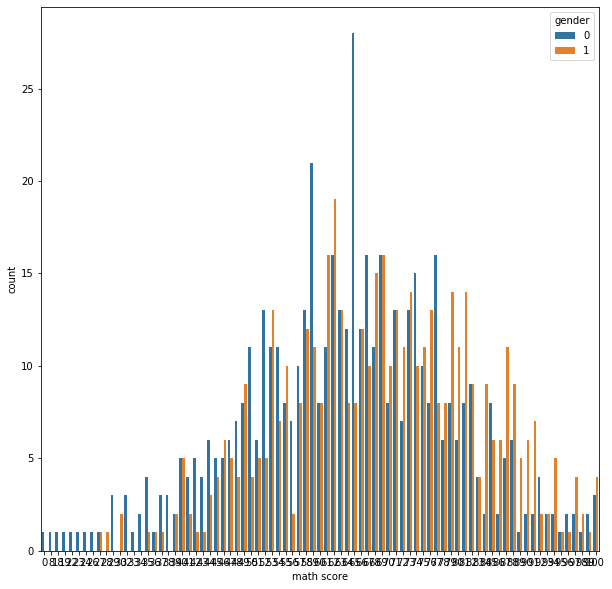

In [16]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(ax = ax, x = data['math score'], hue = data["gender"])

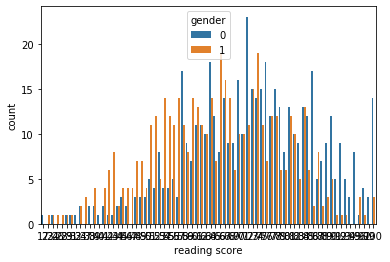

In [17]:
sns.countplot(x = data['reading score'], hue = data["gender"])


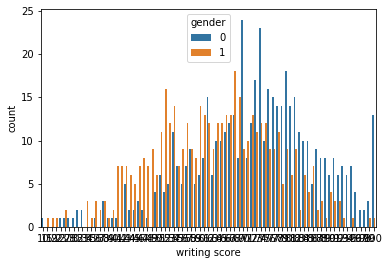

In [18]:
sns.countplot(x = data['writing score'], hue = data["gender"])

The above 3 graphs helps us in understanding the extend of correlation between gender and the target columns
0 - female
1 - male
It can be seen from the plots that in all the 3 cases, higher scores have been scored by gender - 0 

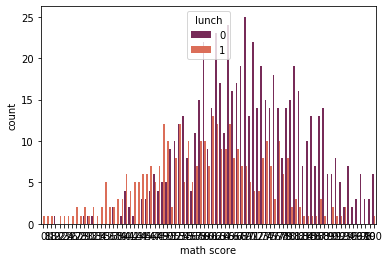

In [19]:
sns.countplot(x = data['math score'], hue = data["lunch"], palette="rocket")

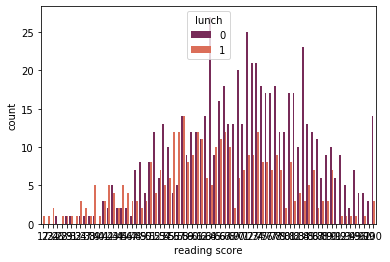

In [20]:
sns.countplot(x = data['reading score'], hue = data["lunch"], palette="rocket")

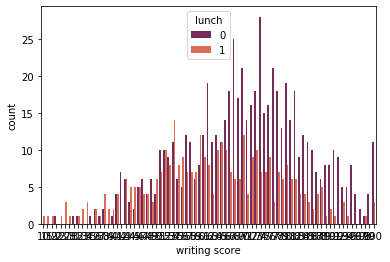

In [21]:
sns.countplot(x = data['writing score'], hue = data["lunch"], palette="rocket")

It can be observed that those who have opted for standard(0) lunch have scored better

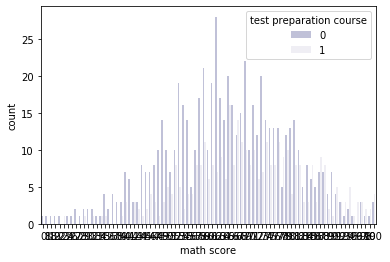

In [22]:
sns.countplot(x = data['math score'], hue = data["test preparation course"], palette=["#bcbddc", "#efedf5"])

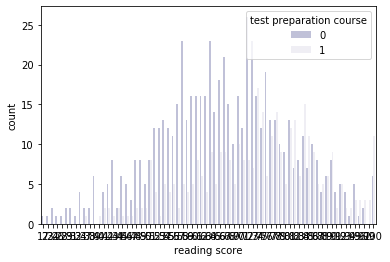

In [23]:
sns.countplot(x = data['reading score'], hue = data["test preparation course"], palette=["#bcbddc", "#efedf5"])

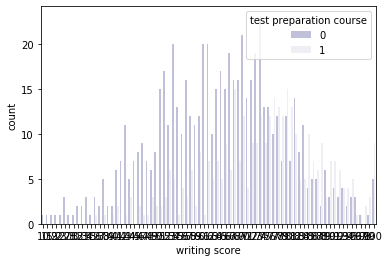

In [24]:
sns.countplot(x = data['writing score'], hue = data["test preparation course"], palette=["#bcbddc", "#efedf5"])

It can be seen here that the student opting for 'none'(0) are high in count and have scored arround average , especially in maths while with 'complete'(0) course plan the result are also average but many made it getting high scores. 

Conclusion:
* If the target variables are math , reading and writing scores then the gender, test preperation course and lunch can be the features(independent variable).
*  gender, test preperation course and lunch features aren't correlated with on another therefore all of them must be used to train the model. 